<a href="https://colab.research.google.com/github/mavroudisv/dpctgan/blob/main/Normalize_SDGym.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sdgym

In [102]:
#Constants
DATASET_NAME = 'census'
HISTOGRAM_BINS = 25
CONFIG_FILENAME = 'normalization_' + DATASET_NAME + '.conf'

In [103]:
import json
from sdgym.datasets import load_dataset
from sklearn import preprocessing
import pandas as pd
import numpy as np

In [ ]:
#Load data and process metadata
tables = load_dataset(DATASET_NAME)
with open('/root/.local/share/SDGym/datasets/'+ DATASET_NAME + '/metadata.json') as json_file:
    metadata = json.load(json_file)
fields = metadata['tables'][DATASET_NAME]['fields']
numerical_fields = []
for f in fields:
  if fields[f]['type'] != 'categorical':
    numerical_fields.append(f)
numerical_fields

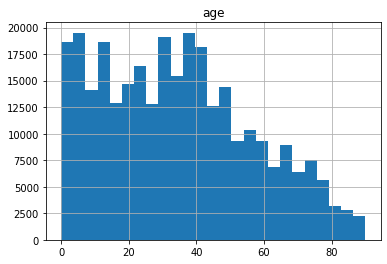

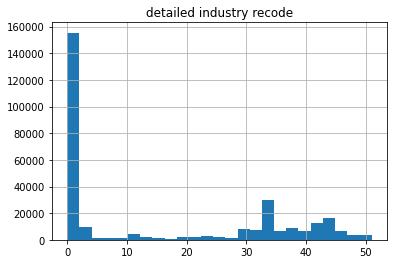

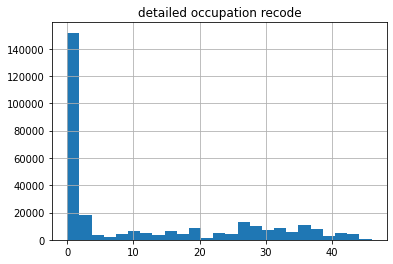

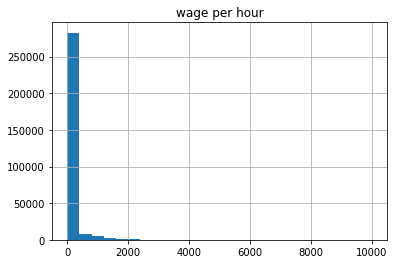

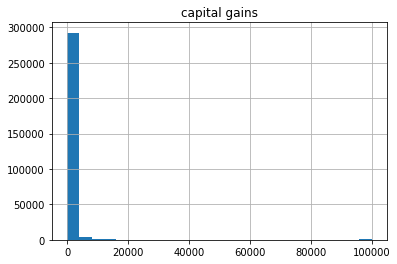

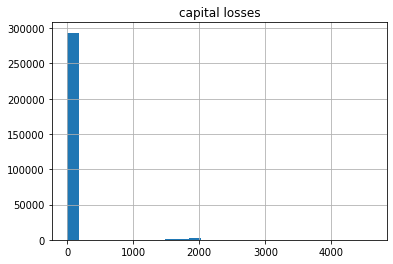

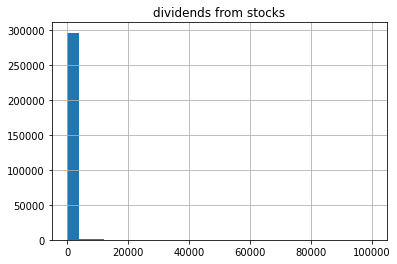

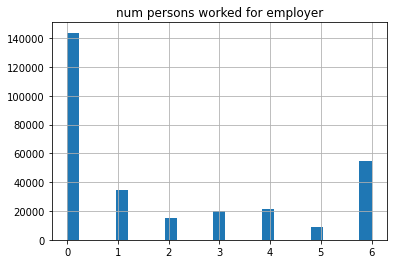

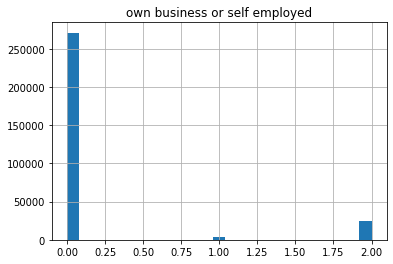

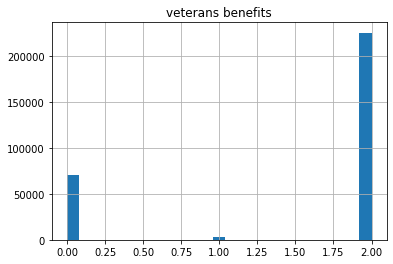

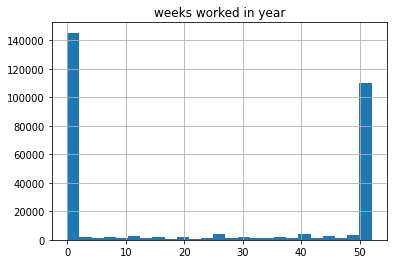

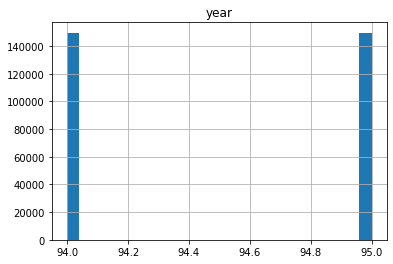

In [105]:
#Visualization
table = tables.load_table(DATASET_NAME)
for field in numerical_fields:
  table.hist(column=field, bins=HISTOGRAM_BINS)


In [111]:
# Generate Config file
config = {}
for field in numerical_fields:
  config[field] = [table[field].min(),table[field].max()]
  

with open(CONFIG_FILENAME, 'w') as fp:
    json.dump(config, fp)



In [112]:
!cat normalization_*.conf

{"age": [0, 90], "detailed industry recode": [0, 51], "detailed occupation recode": [0, 46], "wage per hour": [0, 9999], "capital gains": [0, 99999], "capital losses": [0, 4608], "dividends from stocks": [0, 99999], "num persons worked for employer": [0, 6], "own business or self employed": [0, 2], "veterans benefits": [0, 2], "weeks worked in year": [0, 52], "year": [94, 95]}

In [113]:
# Clip and normalize
with open(CONFIG_FILENAME) as json_file:
    config = json.load(json_file)
config


#Clip
for field in config:
  lower_value = config[field][0]
  upper_value = config[field][1]
  table[field] = table[field].clip(lower=lower_value, upper=upper_value)


#Normalize
table_normalized = table.copy()
x = table[config.keys()].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=config.keys(), index = table.index)
table_normalized[list(config.keys())] = df_temp
table_normalized

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,label
0,0.811111,Not in universe,0.000000,0.000000,High school graduate,0.0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0.0,0.0,0.0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,?,?,?,Not in universe under 1 year old,?,0.000000,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0.0,Not in universe,1.0,0.0,1.0,- 50000
1,0.644444,Self-employed-not incorporated,0.078431,0.739130,Some college but no degree,0.0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0.0,0.0,0.0,Head of household,South,Arkansas,Householder,Householder,MSA to MSA,Same county,Same county,No,Yes,0.166667,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0.0,Not in universe,1.0,1.0,0.0,- 50000
2,0.200000,Not in universe,0.000000,0.000000,10th grade,0.0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0.0,0.0,0.0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,?,?,?,Not in universe under 1 year old,?,0.000000,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0.0,Not in universe,1.0,0.0,1.0,- 50000
3,0.100000,Not in universe,0.000000,0.000000,Children,0.0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0.0,0.0,0.0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0.000000,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0.0,Not in universe,0.0,0.0,0.0,- 50000
4,0.111111,Not in universe,0.000000,0.000000,Children,0.0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0.0,0.0,0.0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0.000000,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0.0,Not in universe,0.0,0.0,0.0,- 50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299280,0.155556,Not in universe,0.000000,0.000000,Children,0.0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0.0,0.0,0.0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,?,?,?,Not in universe under 1 year old

In [100]:
np.savez(DATASET_NAME+"_norm", table_normalized.values)